## Setup

In [2]:
import numpy as np
import cv2 as cv
from util_func import *
import sys
import math
import imutils

#### Q1. 
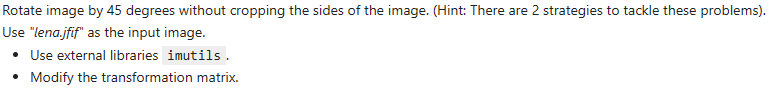

In [3]:
img = cv.imread("images/lena.jfif")
h, w = img.shape[:2]
xc = w // 2
yc = h // 2

# using external libraries "imutils"
rotated = imutils.rotate_bound(img, 45)
show_img("rotated", rotated)

img.shape[:2]

(225, 225)

In [4]:
# using transformation matrix
M = cv.getRotationMatrix2D((xc, yc), 45, math.cos(45)) # smaller scale to fit in the whole image
rotated = cv.warpAffine(img, M, (w ,h))

show_img("rotated opencv", rotated)

#### Q2. 
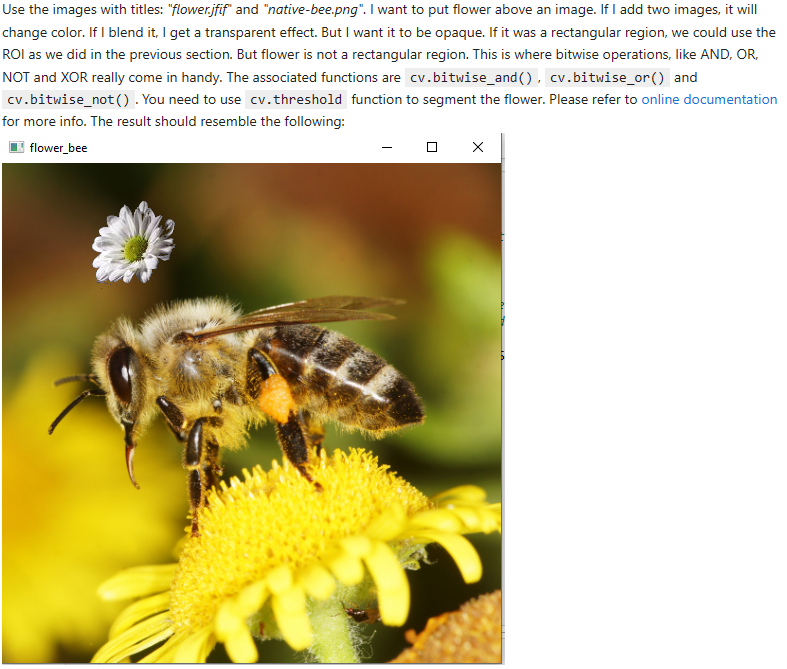

In [34]:
flower = cv.imread("images/flower.jfif")
bees = cv.imread("images/native-bee.png")

cv.imshow("flowers", flower)
show_img("bees", bees)

# convert flower images into grayscale
flower_gs = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)

# apply threshold to the flower images
threshold_img = cv.threshold(flower_gs, 0, 255, cv.THRESH_BINARY)

# return a tuple, index 1 (image) interested
threshold_img = threshold_img[1]

# apply bitwise operator
segment = cv.bitwise_and(flower, flower, mask=threshold_img)

# blend image together
h, w = flower.shape[:2]
bees_seg = bees[0:h, 0:w]
img = cv.addWeighted(bees_seg, 1.0, segment, 1.0, 1)

# replace segment with blended images
bees[0:h, 0:w] = img
show_img("overlay", bees)

#### Q3. 
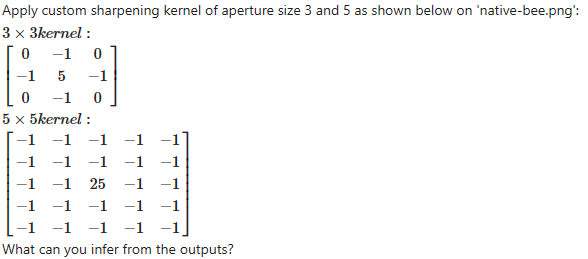

In [6]:
# 3x3 kernel
kernel3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# 5x5 kernel
kernel5 = np.ones((5, 5)) *-1
kernel5[2, 2] = 25


img = cv.imread("images/native-bee.png")

In [7]:
# apply 3x3 kernel to image
dst = cv.filter2D(img, -1, kernel3)
cv.imshow("original", img)
cv.imshow("kernel3", dst)

# the edges of bees and the whole images become clearer

In [8]:
# apply 5x5 kernel to the image
dst5 = cv.filter2D(img, -1, kernel5)
show_img("kernel5", dst5)

# oversharpen, noises appears in the background

#### Q4
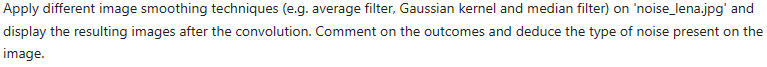

In [9]:
img = cv.imread("images/noise_lena.jpg")

# Gaussian Blur
gs = cv.GaussianBlur(img, (3, 3), 0, 0)
cv.imshow("Gaussian blur", gs)

# median filter
md = cv.medianBlur(img, 3)
cv.imshow("median blur", md)

show_img("original", img)

# median filter remove most of the noise from the original image
# gaussian blur does not as effective as median blur